<a href="https://colab.research.google.com/github/MikeIV2007/DS_HW_05/blob/main/DS_HW_05_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Домашнє завдання**

В домашньому завданні до даного модулю ви потренуєтесь робити тестове завдання для влаштування на роботу. За даними акселерометра з мобільного телефону потрібно класифікувати, якою діяльністю займається людина: йде, стоїть, біжить чи йде по сходах. Знайти датасет ви можете за посиланням.

Використайте алгоритми SVM та випадковий ліс з бібліотеки scikit-learn. Як характеристики можете брати показники з акселерометра, проте щоб покращити результати роботи алгоритмів, спочатку можна підготувати наш датасет і розрахувати часові ознаки (time domain features). Більше ці характеристики описані в даній статті.

Порівняйте результати роботи обох алгоритмів на різних фічах та різні моделі між собою.

Порівняйте результати роботи обох алгоритмів на різних фічах та різні моделі між собою. Використайте метод classification report для порівняння.

Порівняння моделей на основі однієї метрики(такої як Accuracy)- не приймається. Дз повинно бути виконано у Jupyter Nootebook,(або Google Colab) і задеплоїне на Гітхаб у вигляді файлу .ipynb.

In [ ]:
import os
import pandas as pd

# Path to the main folder
#main_folder_path = "path/to/your/data"
main_folder_path = "/content/drive/MyDrive/Colab_data/data"

# List to store individual dataframes
dfs = []

# Mapping of folder names to class labels
class_mapping = {"idle": 0, "running": 1, "stairs": 2, "walking": 3}

# Iterate through subfolders
for folder_name, class_label in class_mapping.items():
    folder_path = os.path.join(main_folder_path, folder_name)

    # Iterate through CSV files in the subfolder
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".csv"):
            file_path = os.path.join(folder_path, file_name)

            # Read CSV file into a dataframe
            df = pd.read_csv(file_path)

            # Add a new column for class label
            df["class"] = class_label

            # Append the dataframe to the list
            dfs.append(df)

# Concatenate all dataframes into one
df = pd.concat(dfs, ignore_index=True)

In [ ]:

display(df.describe())
display(df.info())
display(df.shape)


,accelerometer_X,accelerometer_Y,accelerometer_Z,class
count,193860.000000,193860.000000,193860.000000,193860.000000
mean,1.923550,1.598343,1.804896,1.437326
std,8.404867,12.474041,7.191590,1.067815
min,-39.188293,-39.188293,-39.188293,0.000000
25%,-2.494758,-8.327033,-2.494758,1.000000
50%,0.248997,-0.009577,0.905008,1.000000
75%,4.668694,8.671799,7.187394,3.000000
max,39.188293,39.188293,39.188293,3.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193860 entries, 0 to 193859
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   accelerometer_X  193860 non-null  float64
 1   accelerometer_Y  193860 non-null  float64
 2   accelerometer_Z  193860 non-null  float64
 3   class            193860 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 5.9 MB


None

(193860, 4)

In [ ]:
# Calculate mean for each class
mean_df = df.groupby('class').mean().add_prefix('mean_')

# Calculate standard deviation for each class
std_df = df.groupby('class').std().add_prefix('std_')

# Calculate minimum for each class
min_df = df.groupby('class').min().add_prefix('min_')

# Calculate maximum for each class
max_df = df.groupby('class').max().add_prefix('max_')

# Combine all the calculated features
time_domain_features = pd.concat([mean_df, std_df, min_df, max_df], axis=1)

# Print the resulting time domain features dataframe
#print(time_domain_features)
display(time_domain_features)


       mean_accelerometer_X  mean_accelerometer_Y  mean_accelerometer_Z  \
class                                                                     
0                  0.096767              2.225971              8.973247   
1                  5.045705              8.083135              1.387356   
2                  0.353135             -9.574353             -1.841333   
3                 -2.661943             -9.703702             -1.126623   

       std_accelerometer_X  std_accelerometer_Y  std_accelerometer_Z  \
class                                                                  
0                 0.691892             2.821235             1.211058   
1                 9.952696            12.441402             7.004236   
2                 3.845949             4.922294             5.297376   
3                 4.648378             5.931165             6.927679   

       min_accelerometer_X  min_accelerometer_Y  min_accelerometer_Z  \
class                                       

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Separate features (X) and labels (y)
X = df.drop('class', axis=1)
y = df['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional, but often recommended for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train_scaled, y_train)

# Predictions using SVM
svm_predictions = svm_classifier.predict(X_test_scaled)

# Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions using Random Forest
rf_predictions = rf_classifier.predict(X_test)

# Evaluate the models
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))
print("SVM Classification Report:\n", classification_report(y_test, svm_predictions))

print("\nRandom Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))


SVM Accuracy: 0.816671825028371
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79      6203
           1       0.85      0.85      0.85     20485
           2       0.00      0.00      0.00      1022
           3       0.76      0.85      0.81     11062

    accuracy                           0.82     38772
   macro avg       0.60      0.62      0.61     38772
weighted avg       0.80      0.82      0.81     38772


Random Forest Accuracy: 0.9996131228721759
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6203
           1       1.00      1.00      1.00     20485
           2       1.00      0.99      0.99      1022
           3       1.00      1.00      1.00     11062

    accuracy                           1.00     38772
   macro avg       1.00      1.00      1.00     38772
weighted avg       1.00      1.00      1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import classification_report

# ... (previous code)

# Evaluate the models
svm_report = classification_report(y_test, svm_predictions, target_names=['idle', 'running', 'stairs', 'walking'])
rf_report = classification_report(y_test, rf_predictions, target_names=['idle', 'running', 'stairs', 'walking'])

# Print classification reports
print("SVM Classification Report:\n", svm_report)
print("\nRandom Forest Classification Report:\n", rf_report)


SVM Classification Report:
               precision    recall  f1-score   support

        idle       0.80      0.78      0.79      6203
     running       0.85      0.85      0.85     20485
      stairs       0.00      0.00      0.00      1022
     walking       0.76      0.85      0.81     11062

    accuracy                           0.82     38772
   macro avg       0.60      0.62      0.61     38772
weighted avg       0.80      0.82      0.81     38772


Random Forest Classification Report:
               precision    recall  f1-score   support

        idle       1.00      1.00      1.00      6203
     running       1.00      1.00      1.00     20485
      stairs       1.00      0.99      0.99      1022
     walking       1.00      1.00      1.00     11062

    accuracy                           1.00     38772
   macro avg       1.00      1.00      1.00     38772
weighted avg       1.00      1.00      1.00     38772



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



The time_domain_features you've calculated include statistical measures such as mean, standard deviation, minimum, and maximum for each accelerometer axis (X, Y, Z) grouped by class. These features can be used to enhance your models by providing more information about the distribution and variability of the accelerometer data.

Here are some ways you can utilize these features to improve your models:

**Feature Concatenation:**

Concatenate the time domain features with the original features from the accelerometer data.
This will provide the model with additional information about the statistical characteristics of the data.

**Feature Scaling:**

If you haven't already scaled your features, make sure to scale them, especially if you're using algorithms like SVM that are sensitive to the scale of input features.

**Feature Selection:**

Analyze the importance of each feature using techniques like feature importance from ensemble models (e.g., Random Forest).
Select the most relevant features to improve model efficiency.

**Hyperparameter Tuning:**

Experiment with different hyperparameters for your models based on the extended feature set.
For SVM, try different kernel functions and regularization parameters.
For Random Forest, adjust the number of estimators, depth, and other relevant hyperparameters.
Here's an example of how to concatenate the time_domain_features with the original dataset and use it for training:

In [ ]:
# Assuming 'df' is your original dataset and 'time_domain_features' is the calculated dataframe

# Merge the original dataset with time domain features on 'class'
merged_df = pd.merge(df, time_domain_features, left_on='class', right_index=True, how='left')

# Separate features (X) and labels (y) from the merged dataframe
X_extended = merged_df.drop('class', axis=1)
y_extended = merged_df['class']

# Split the extended dataset into training and testing sets
X_train_extended, X_test_extended, y_train_extended, y_test_extended = train_test_split(
    X_extended, y_extended, test_size=0.2, random_state=42
)

# ... (continue with SVM and Random Forest training and evaluation)


Experiment with these suggestions and observe how they impact your model's performance. Keep in mind that the effectiveness of these enhancements may vary based on the characteristics of your specific dataset.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# # Separate features (X) and labels (y)
# X = df.drop('class', axis=1)
# y = df['class']

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Merge the original dataset with time domain features on 'class'
merged_df = pd.merge(df, time_domain_features, left_on='class', right_index=True, how='left')

# Separate features (X) and labels (y) from the merged dataframe
X = merged_df.drop('class', axis=1)
y = merged_df['class']

# Split the extended dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize the features (optional, but often recommended for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train_scaled, y_train)

# Predictions using SVM
svm_predictions = svm_classifier.predict(X_test_scaled)

# Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions using Random Forest
rf_predictions = rf_classifier.predict(X_test)

# Evaluate the models
svm_report = classification_report(y_test, svm_predictions, target_names=['idle', 'running', 'stairs', 'walking'])
rf_report = classification_report(y_test, rf_predictions, target_names=['idle', 'running', 'stairs', 'walking'])

# Print classification reports
print("SVM Classification Report:\n", svm_report)
print("\nRandom Forest Classification Report:\n", rf_report)

SVM Classification Report:
               precision    recall  f1-score   support

        idle       1.00      1.00      1.00      6203
     running       1.00      1.00      1.00     20485
      stairs       1.00      1.00      1.00      1022
     walking       1.00      1.00      1.00     11062

    accuracy                           1.00     38772
   macro avg       1.00      1.00      1.00     38772
weighted avg       1.00      1.00      1.00     38772


Random Forest Classification Report:
               precision    recall  f1-score   support

        idle       1.00      1.00      1.00      6203
     running       1.00      1.00      1.00     20485
      stairs       1.00      1.00      1.00      1022
     walking       1.00      1.00      1.00     11062

    accuracy                           1.00     38772
   macro avg       1.00      1.00      1.00     38772
weighted avg       1.00      1.00      1.00     38772



In [ ]:
merged_df

,accelerometer_X,accelerometer_Y,accelerometer_Z,class,mean_accelerometer_X,mean_accelerometer_Y,mean_accelerometer_Z,std_accelerometer_X,std_accelerometer_Y,std_accelerometer_Z,min_accelerometer_X,min_accelerometer_Y,min_accelerometer_Z,max_accelerometer_X,max_accelerometer_Y,max_accelerometer_Z
0,-0.100556,0.225055,9.768343,0,0.096767,2.225971,8.973247,0.691892,2.821235,1.211058,-10.448297,-2.595315,-0.296881,8.135497,9.916783,21.988348
1,-0.100556,0.225055,9.753978,0,0.096767,2.225971,8.973247,0.691892,2.821235,1.211058,-10.448297,-2.595315,-0.296881,8.135497,9.916783,21.988348
2,-0.095768,0.225055,9.787497,0,0.096767,2.225971,8.973247,0.691892,2.821235,1.211058,-10.448297,-2.595315,-0.296881,8.135497,9.916783,21.988348
3,-0.110133,0.210690,9.758766,0,0.096767,2.225971,8.973247,0.691892,2.821235,1.211058,-10.448297,-2.595315,-0.296881,8.135497,9.916783,21.988348
4,-0.119710,0.234632,9.758766,0,0.096767,2.225971,8.973247,0.691892,2.821235,1.211058,-10.448297,-2.595315,-0.296881,8.135497,9.916783,21.988348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193855,14.714764,-30.085539,-5.980716,3,-2.661943,-9.703702,-1.126623,4.648378,5.931165,6.927679,-26.815060,-39.188293,-39.169140,20.575770,14.441825,38.426937
193856,-2.695871,-15.361198,8.753201,3,-2.661943,-9.703702,-1.126623,4.648378,5.931165,6.927679,-26.815060,-39.188293,-39.169140,20.575770,14.441825,38.426937
193857,-6.387730,8.221689,8.834604,3,-2.661943,-9.703702,-1.126623,4.648378,5.931165,6.927679,-26.815060,-39.188293,-39.169140,20.575770,14.441825,38.426937
193858,4.850653,-16.845604,-6.435614,3,-2.661943,-9.703702,-1.126623,4.648378,5.931165,6.927679,-26.815060,-39.188293,-39.169140,20.575770,14.441825,38.426937


In [ ]:
# Assuming 'svm_classifier' is your trained SVM model
svm_params = svm_classifier.get_params()

# Print the parameters
print("SVM Parameters:")
print(svm_params)


SVM Parameters:
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [ ]:
# Assuming 'rf_classifier' is your trained Random Forest model
rf_params = rf_classifier.get_params()

# Print the parameters
print("Random Forest Parameters:")
print(rf_params)


Random Forest Parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}



For Support Vector Machines (SVM), the coefficients (weights) and formulas for the hypothesis depend on the type of kernel used. The linear kernel is common, so let's consider that:

For a linear SVM, the decision function is given by:

f(x)=sign(w⋅x+b)

Here,
w is the weight vector,
x is the input feature vector, and
b is the bias term. The sign function returns +1 or -1, classifying the input into one of two classes.

For Random Forest, the decision function is not expressed in the same explicit form as in linear SVM. Instead, Random Forest is an ensemble model composed of decision trees. Each tree makes an individual decision, and the final prediction is based on a majority vote or average (for regression).

However, you can inspect the feature importances in Random Forest to understand which features contribute more to the decision-making process. The higher the importance, the more influential the feature is in determining the output.

For SVM, you can retrieve the coefficients and intercept from the coef_ and intercept_ attributes after training:

In [ ]:
# Assuming 'svm_classifier' is your trained SVM model
svm_coefficients = svm_classifier.coef_
svm_intercept = svm_classifier.intercept_

# Print coefficients and intercept
print("SVM Coefficients:")
print(svm_coefficients)
print("\nSVM Intercept:")
print(svm_intercept)

SVM Coefficients:
[[-1.07751550e+00 -1.25989739e+00  2.02876458e+00]
 [ 2.31073584e-01  3.68623171e+00  1.51797795e+00]
 [ 2.11641996e+00  4.01983532e+00  1.11518411e+00]
 [ 8.63348146e-06  3.01289274e-05  1.57396698e-07]
 [ 1.61194065e+00  2.36136050e+00 -6.73279405e-01]
 [ 4.11429617e-05  1.04959609e-05  1.75043085e-05]]

SVM Intercept:
[-1.625743    0.28255939  0.72019577  0.99998541  1.40680799 -0.99998444]


Keep in mind that for SVM with a linear kernel, the decision boundary is a hyperplane, and the coefficients represent the weights of the features in that hyperplane.

For Random Forest, as mentioned earlier, you can access the feature importances:

In [ ]:
# Assuming 'rf_classifier' is your trained Random Forest model
rf_feature_importances = rf_classifier.feature_importances_

# Print feature importances
print("Random Forest Feature Importances:")
print(rf_feature_importances)


Random Forest Feature Importances:
[0.31133793 0.43782799 0.25083407]


These values indicate the relative importance of each feature in the decision-making process of the Random Forest model.

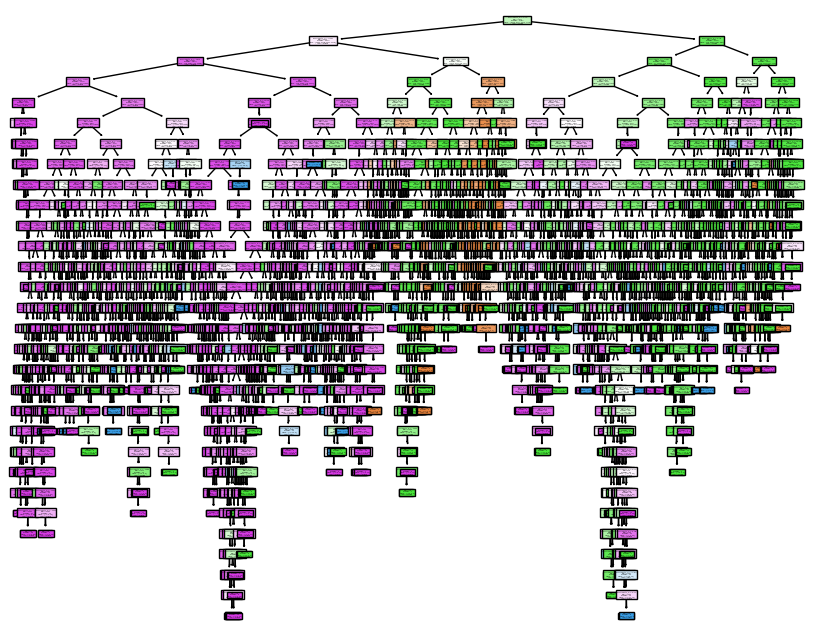

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming 'rf_classifier' is your trained Random Forest model
# and you want to visualize the first tree in the forest (index 0)
tree_to_visualize = rf_classifier.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(10, 8))
plot_tree(tree_to_visualize, feature_names=X.columns, class_names=['idle', 'running', 'stairs', 'walking'], filled=True)
plt.show()
